## Öğrenci Başarı Göstergesi

#### Makine Öğrenmesi Projesinin Yaşam Döngüsü

- Problem Tanımının Anlaşılması
- Veri Toplama
- Veri Kontrollerinin Yapılması
- Keşifsel Veri Analizi (EDA)
- Veri Ön İşleme
- Model Eğitimi
- En İyi Modelin Seçilmesi

### 1) Problem Tanımı
- Bu proje, öğrencinin performansının; cinsiyet, etnik köken, ebeveyn eğitim seviyesi, öğle yemeği tipi ve sınav hazırlık kursu gibi değişkenlerden nasıl etkilendiğini anlamayı amaçlamaktadır.


### 2) Veri Toplama
- Veri Seti Kaynağı - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Veri seti 8 sütun (columns) ve 1000 satırdan (rows) oluşmaktadır.

### 2.1 Veriyi ve Gerekli Kütüphaneleri İçe Aktarma
####  Pandas, Numpy, Matplotlib, Seaborn ve Warnings Kütüphanelerinin İçe Aktarılması

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### CSV verisini Pandas DataFrame olarak içe aktarma

In [4]:
df = pd.read_csv('data/stud.csv')

#### İlk 5 kaydı göster

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Veri setinin boyutu

In [ ]:
df.shape

(1000, 8)

### 2.2 Veri seti bilgisi

- gender : öğrencinin cinsiyeti → (Male/Female)
- race/ethnicity : öğrencinin etnik kökeni -> (Group A, B,C, D,E)
- parental level of education : ebeveynin eğitim seviyesi ->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : sınav öncesi öğle yemeği durumu (standard or free/reduced) 
- test preparation course : sınav öncesi hazırlık kursunu tamamlama durumu -> (complete or not complete)  
- math score
- reading score
- writing score

### 3. Yapılacak Veri Kontrolleri

- Eksik değerlerin kontrolü (Check Missing Values)
- Tekrarlayan kayıtların kontrolü (Check Duplicates)
- Veri türlerinin kontrolü (Check Data Type)
- Her sütunun benzersiz değer sayısının kontrolü
- Veri setinin istatistiklerinin kontrolü
- Farklı kategorik sütunlarda bulunan kategorilerin kontrolü


### 3.1 Eksik değerlerin kontrolü (Check Missing Values)

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Veri setinde eksik değerler (missing values) yok.

### 3.2 Tekrarlayan kayıtların kontrolü (Check Duplicates)

In [6]:
df.duplicated().sum()

np.int64(0)

#### Veri setinde tekrarlayan (duplicate) kayıtlar yok.

### 3.3 Veri türlerinin kontrolü (Check Data Type)

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Her sütunun benzersiz değer sayısının kontrolü

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Veri setinin istatistiklerinin kontrolü

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Yorum (Insight)
- Sayısal verilerin (numerical data) açıklamasından, tüm ortalamalar (means) birbirine çok yakın → 66 ile 68.05 arasında.
- Tüm standart sapmalar (standard deviations) da birbirine yakın → 14.6 ile 15.19 arasında.
- Matematikte (math) minimum puan 0 iken, yazmada (writing) minimum daha yüksek = 10, okumada (reading) minimum daha yüksek = 17.

### 3.7 Veriyi Keşfetme (Exploring Data)

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end="")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('Toplam  {} sayısal özellik (numerical features) var : {}'.format(len(numeric_features), numeric_features))
print('\nToplam {} kategorik özellik (categorical features) var: {}'.format(len(categorical_features), categorical_features))

Toplam  3 sayısal özellik (numerical features) var : ['math_score', 'reading_score', 'writing_score']

Toplam 5 kategorik özellik (categorical features) var: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 “Total Score” ve “Average” sütunlarının eklenmesi

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Yorumlar (Insights)
 - Yukarıdaki değerlere göre öğrenciler Maths bölümünde en düşük performansı göstermiş.
 - En iyi performans reading bölümünde.

### 4. Veriyi Keşfetme (Görselleştirme) (Exploring Data - Visualization)
#### 4.1 Ortalama skor dağılımını görselleştirerek bazı sonuçlar çıkarma (Visualize Average Score Distribution to Make Some Conclusion)
- Histogram
- Kernel Dağılım Fonksiyonu (Kernel Distribution Function - KDE)

#### 4.1.1 Histogram & KDE

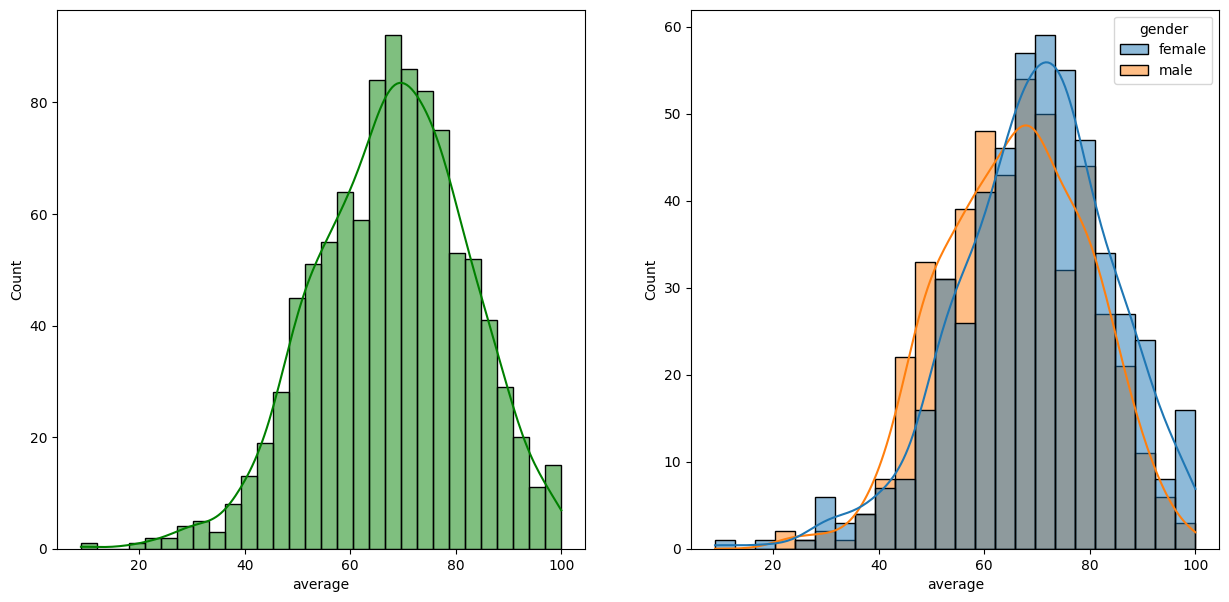

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

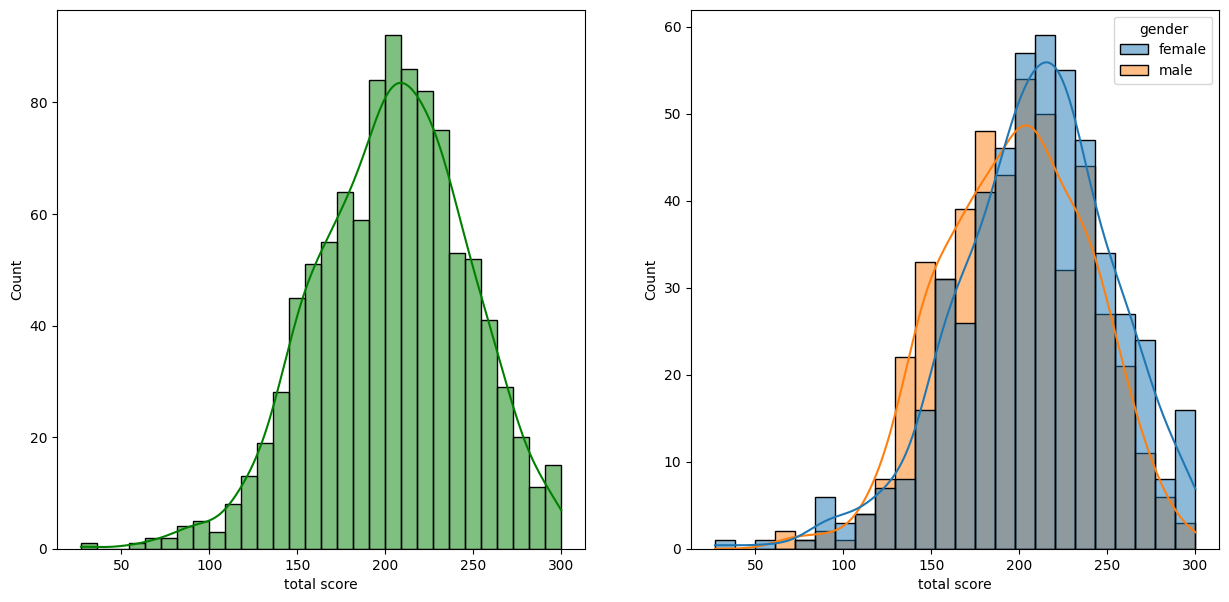

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Yorumlar (Insights)
- Kadın öğrenciler, Erkek öğrencilere göre genellikle daha iyi performans gösteriyor.

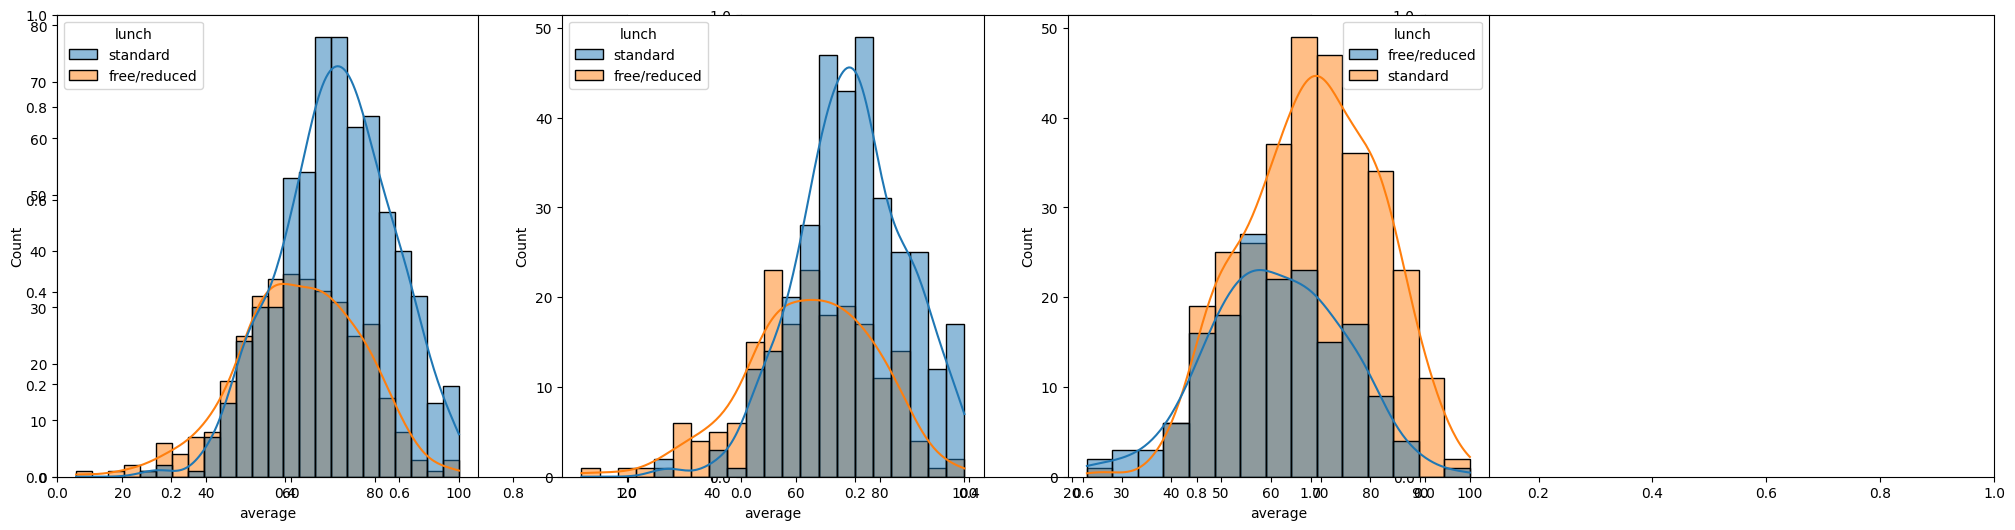

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Yorumlar (Insights)
- Standard öğle yemeği, sınavlarda daha iyi performans göstermeye yardımcı oluyor.
- Bu etki, Erkek veya Kadın tüm öğrenciler için geçerli.

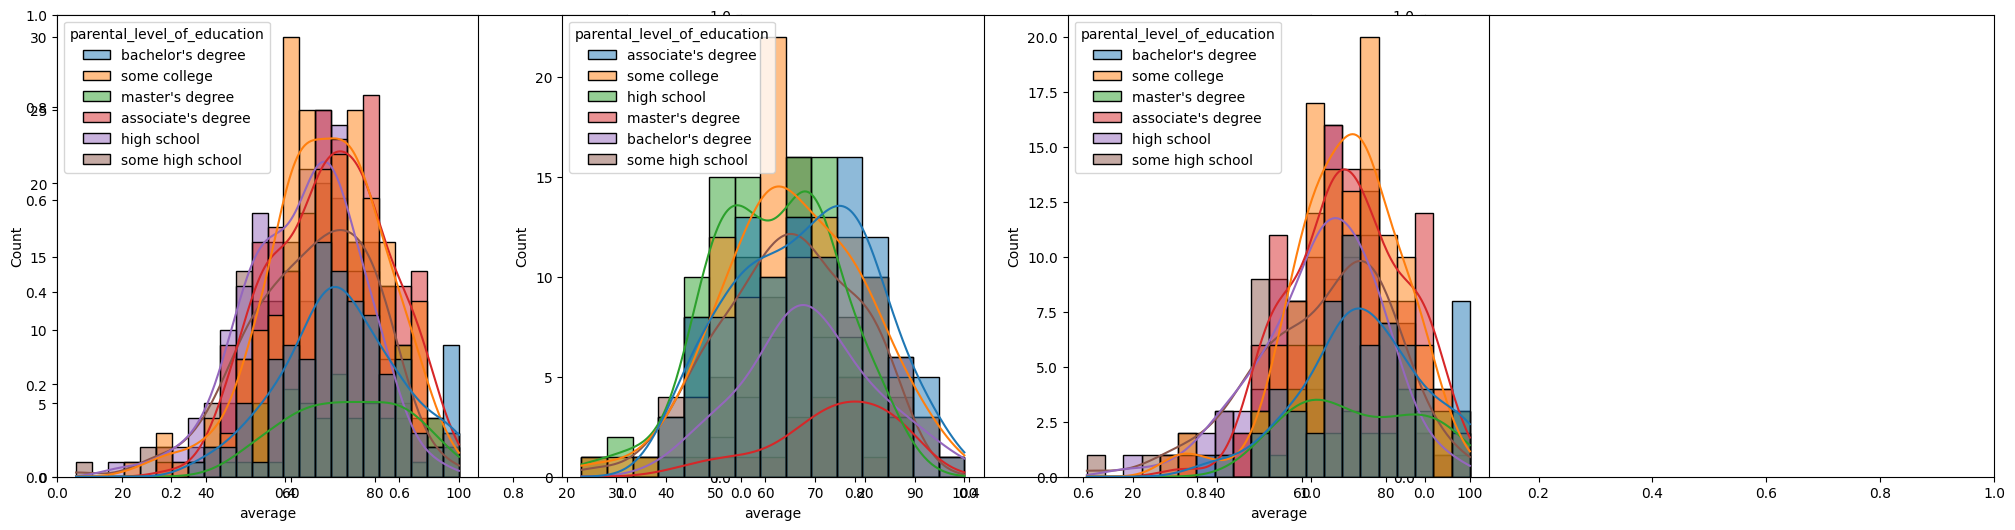

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

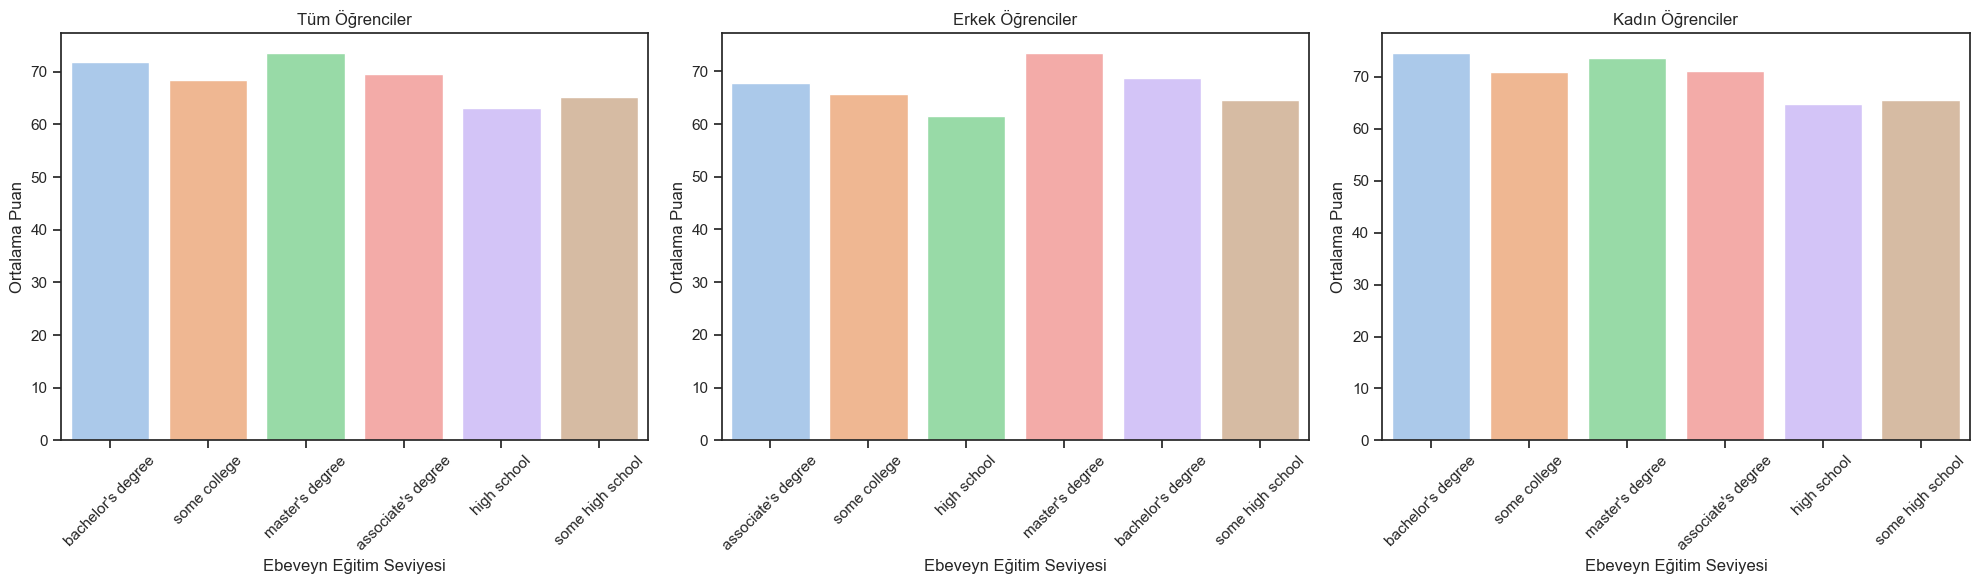

In [86]:
fig, axes = plt.subplots(1,3,figsize=(20,6))

# 1. Tüm öğrenciler
sns.barplot(x='parental_level_of_education', y='average', data=df, ci=None, palette='pastel', ax=axes[0])
axes[0].set_title("Tüm Öğrenciler")
axes[0].set_xlabel("Ebeveyn Eğitim Seviyesi")
axes[0].set_ylabel("Ortalama Puan")
axes[0].tick_params(axis='x', rotation=45)

# 2. Kadın öğrenciler
sns.barplot(x='parental_level_of_education', y='average', data=df[df.gender=='male'], ci=None, palette='pastel', ax=axes[1])
axes[1].set_title("Erkek Öğrenciler")
axes[1].set_xlabel("Ebeveyn Eğitim Seviyesi")
axes[1].set_ylabel("Ortalama Puan")
axes[1].tick_params(axis='x', rotation=45)

# 3. Erkek öğrenciler
sns.barplot(x='parental_level_of_education', y='average', data=df[df.gender=='female'], ci=None, palette='pastel', ax=axes[2])
axes[2].set_title("Kadın Öğrenciler")
axes[2].set_xlabel("Ebeveyn Eğitim Seviyesi")
axes[2].set_ylabel("Ortalama Puan")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#####  Yorumlar (Insights)
- Genel olarak, ebeveynlerin eğitim seviyesi (parent's education) öğrencilerin sınav performansını etkilemiyor.
- İkinci grafikte, master's degree eğitimine sahip ebeveynlerin erkek çocuklarının sınavda daha iyi performans gösterdiği gözlemleniyor.
- Üçüncü grafikte, ebeveynlerin eğitim seviyesinin kadın öğrenciler üzerinde bir etkisi olmadığı görülüyor.

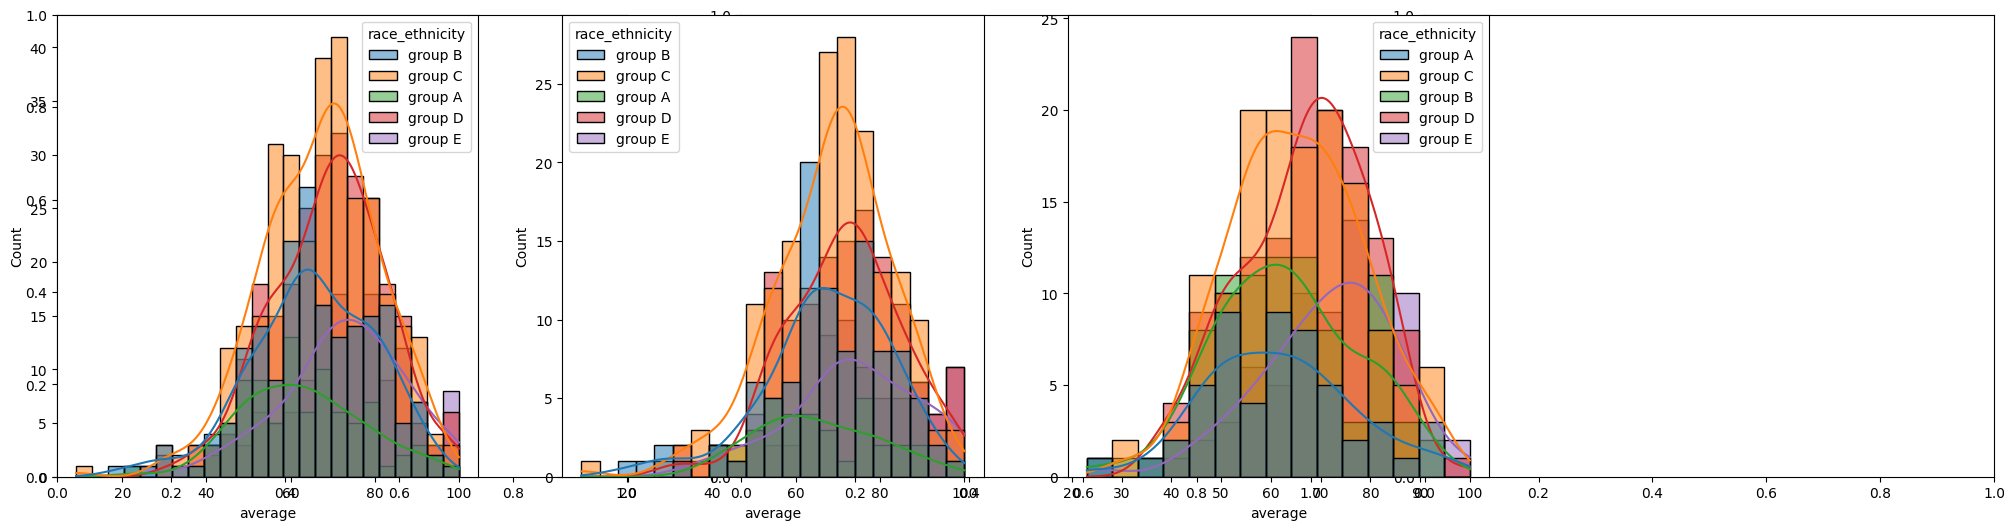

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Yorumlar (Insights)
- Group A ve Group B öğrencileri, sınavlarda genellikle düşük performans gösteriyor.
- Bu durum, öğrencilerin Erkek veya Kadın olmasına bakılmaksızın geçerli.

#### 4.2 Tüm derslerde öğrencilerin maksimum puanı

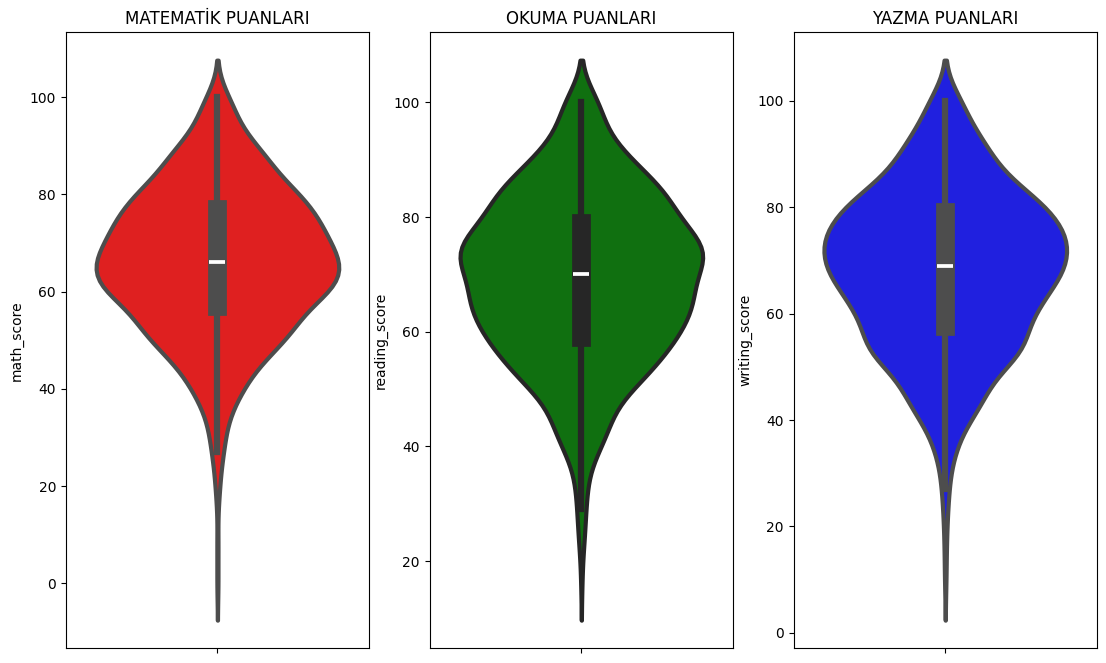

In [22]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATEMATİK PUANLARI')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('OKUMA PUANLARI')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('YAZMA PUANLARI')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Yorumlar (Insights)
- Yukarıdaki üç grafikten açıkça görülüyor ki, öğrencilerin çoğu matematikte 60-80 arasında, okume ve yazmada ise çoğunluğu 50-80 aralığında puan alıyor.

#### 4.3 Çok değişkenli analiz (Multivariate Analysis) – Pieplot kullanarak

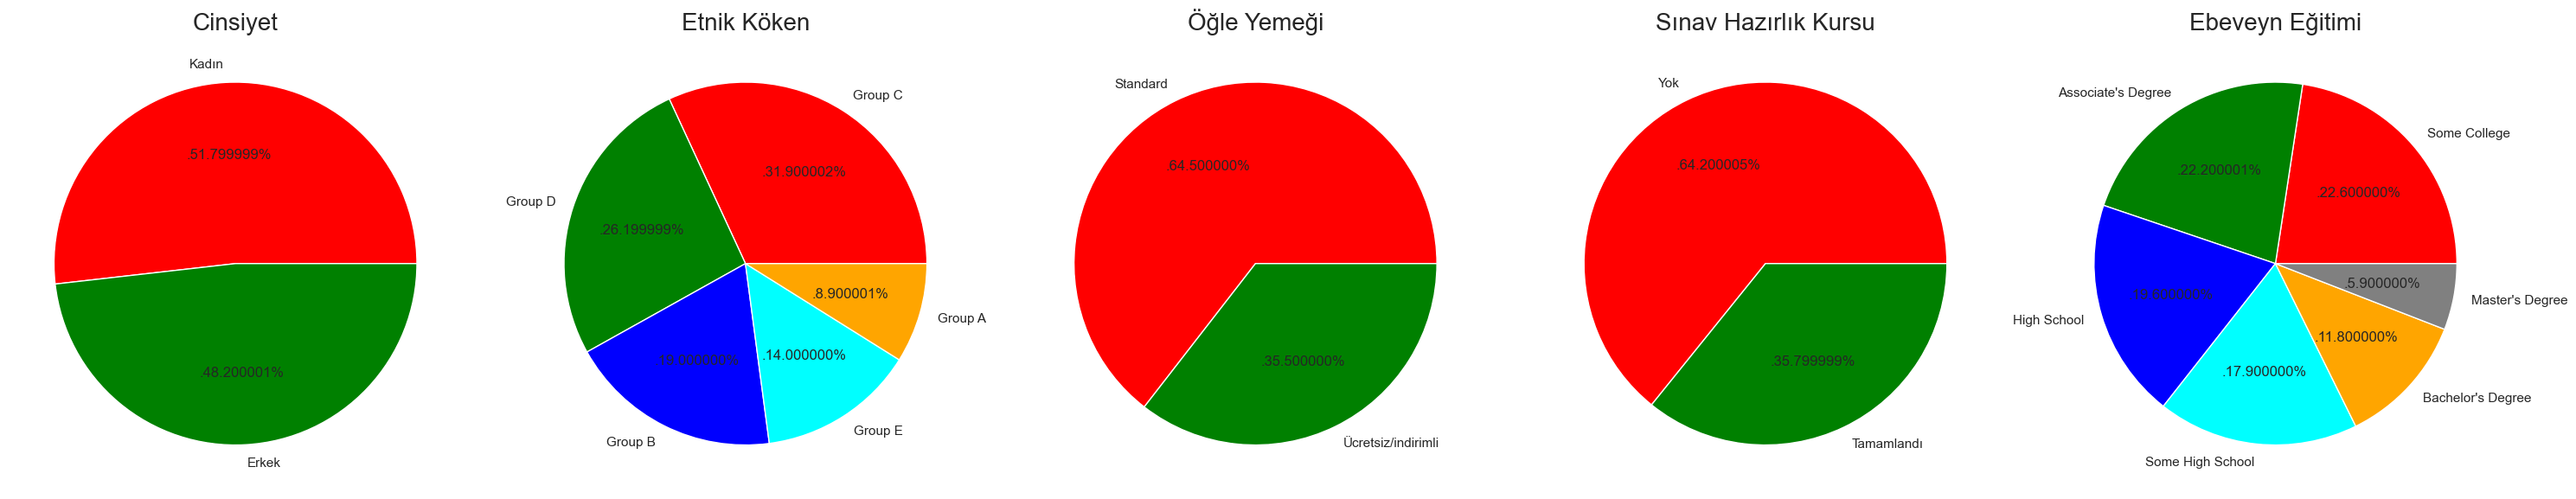

In [36]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Kadın', 'Erkek'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Cinsiyet', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Etnik Köken', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Ücretsiz/indirimli'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Öğle Yemeği', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'Yok', 'Tamamlandı'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Sınav Hazırlık Kursu', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Ebeveyn Eğitimi', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Yorumlar (Insights)
- Erkek ve Kadın öğrenci sayısı neredeyse eşit.
- Öğrenci sayısı en fazla olan grup Group C.
- "Standard lunch" alan öğrenci sayısı daha fazla.
- Hiçbir sınav hazırlık kursu (test preparation course)’a katılmamış öğrenci sayısı daha fazla.
- Ebeveyn eğitimi (parental education) "Some College" olan öğrencilerin sayısı en fazla, bunu "Associate's Degree" takip ediyor.

#### 4.4 Özellik Bazlı Görselleştirme (Feature Wise Visualization)
#### 4.4.1 Cinsiyet Sütunu (GENDER COLUMN)
- Cinsiyet dağılımı nasıl?
- Cinsiyet, öğrencinin performansını etkiliyor mu?

#### Tek Değişkenli Analiz (Univariate Analysis) – Cinsiyet dağılımı nasıl?

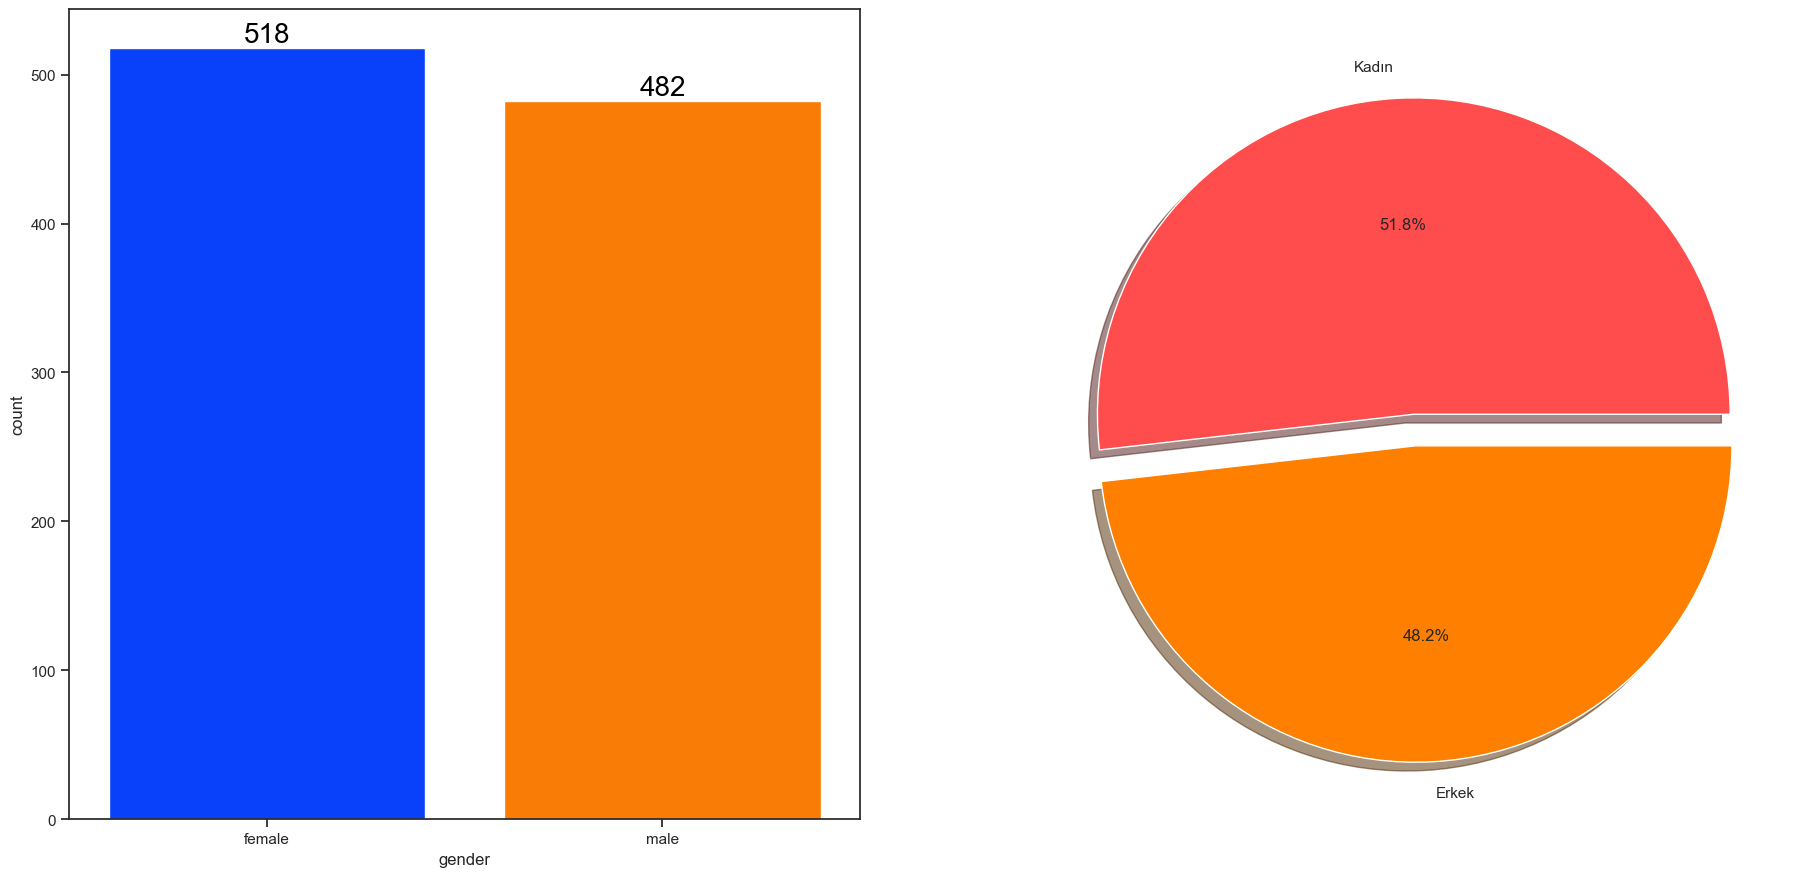

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Kadın','Erkek'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Yorumlar (Insights)
- Cinsiyet verisi dengeli; Kadın öğrenciler 518 (%52), Erkek öğrenciler 482 (%48).

#### İki Değişkenli Analiz (Bivariate Analysis) – Cinsiyet, öğrencinin performansını etkiliyor mu?

In [25]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


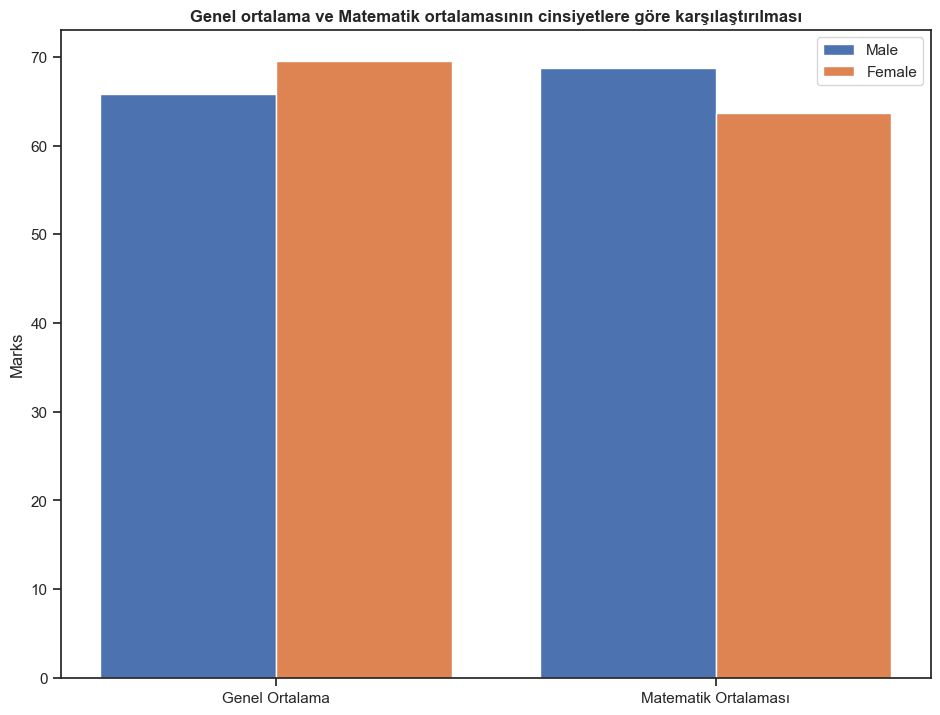

In [41]:
plt.figure(figsize=(10, 8))

X = ['Genel Ortalama','Matematik Ortalaması']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Genel ortalama ve Matematik ortalamasının cinsiyetlere göre karşılaştırılması", fontweight='bold')
plt.legend()
plt.show()

#### Yorumlar
- Ortalama olarak Kadın öğrencilerin toplam puanı Erkek öğrencilere göre daha yüksek.
- Ancak Matematikte Erkek öğrenciler daha yüksek puan almış.

#### 4.4.2 Irk/Etnik Köken Sütunu
- Grup bazında dağılım nasıl?
- Irk/Etnik Köken, öğrencinin performansını etkiliyor mu?

#### Tek Değişkenli Analiz (Univariate Analysis) – Grup bazında dağılım nasıl?

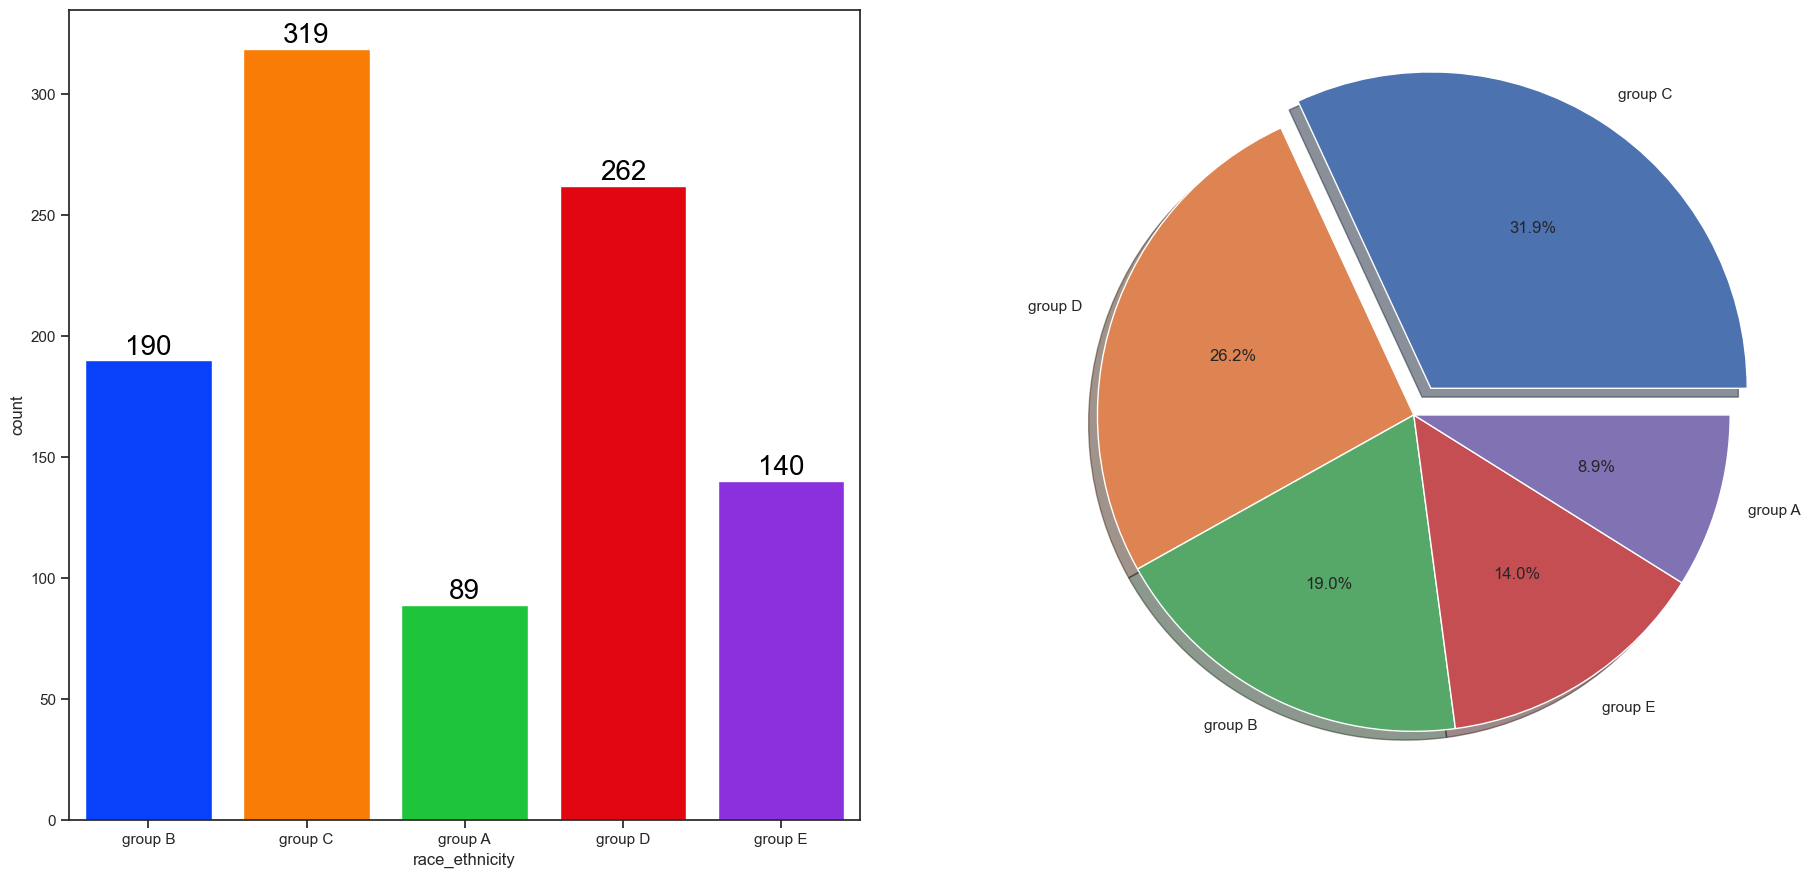

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Yorumlar 
- Öğrencilerin çoğu Group C veya Group D’ye ait.
- En az öğrenci Group A’ya ait.

#### İki Değişkenli Analiz (Bivariate Analysis) – Race/Ethnicity, öğrencinin performansını etkiliyor mu?

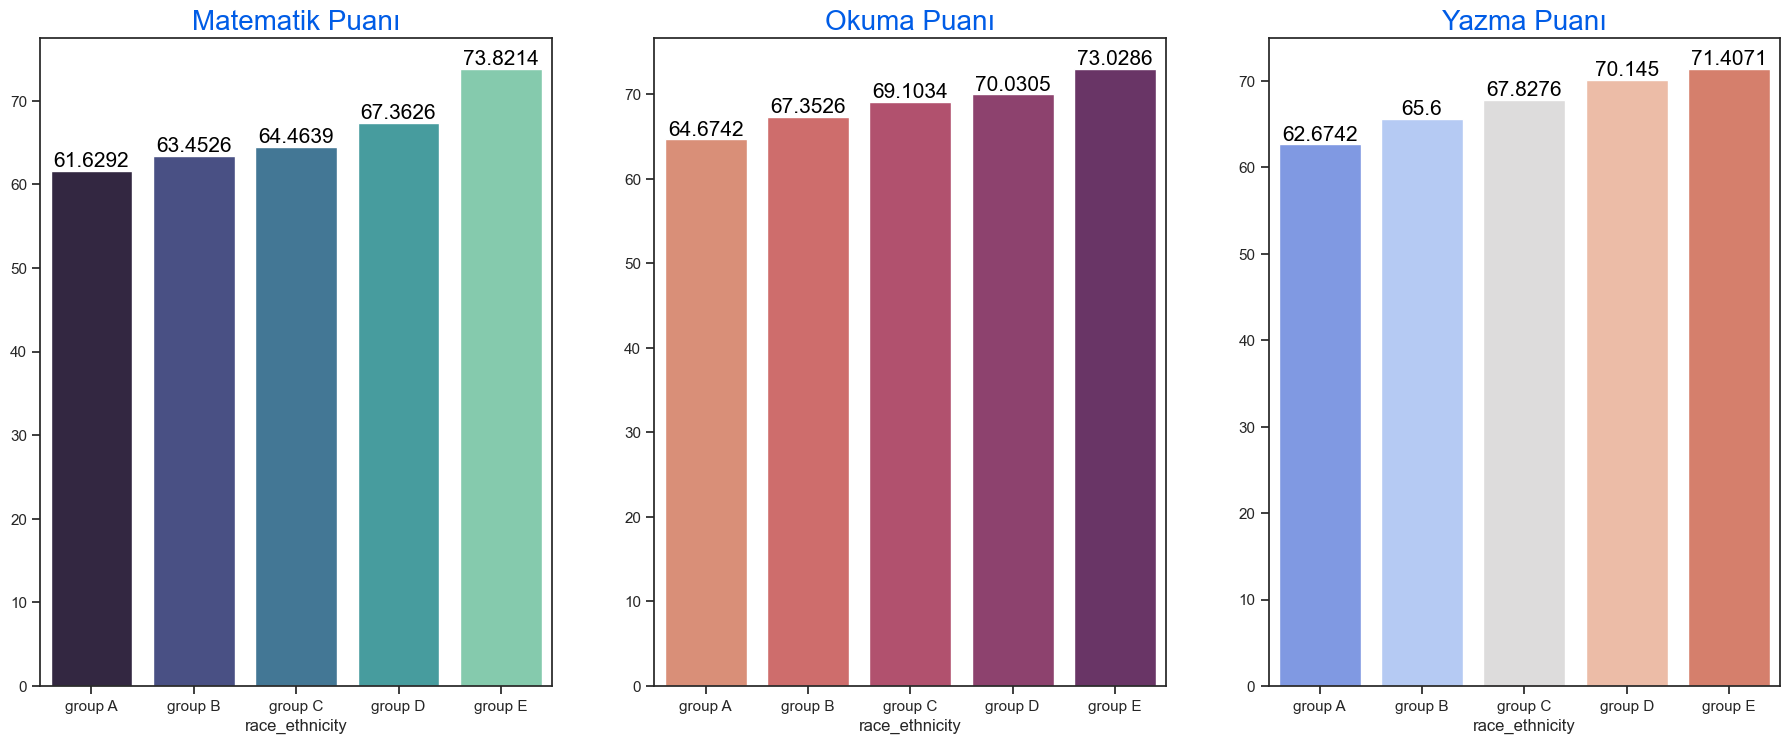

In [43]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Matematik Puanı',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Okuma Puanı',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Yazma Puanı',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Yorumlar 
- Group E öğrencileri en yüksek puanı almış.
- Group A öğrencileri en düşük puanı almış.
- Daha düşük sosyoekonomik duruma sahip öğrencilerin tüm derslerde ortalaması daha düşük.

#### 4.4.3 Ebeveynin Eğitim Seviyesi (Parental Level of Education) Sütunu
- Öğrencinin ebeveynlerinin eğitim geçmişi nedir?
- Ebeveynin eğitim seviyesi, öğrencinin performansını  etkiliyor mu?

#### Tek Değişkenli Analiz (Univariate Analysis) – Öğrencinin ebeveynlerinin eğitim geçmişi nedir?

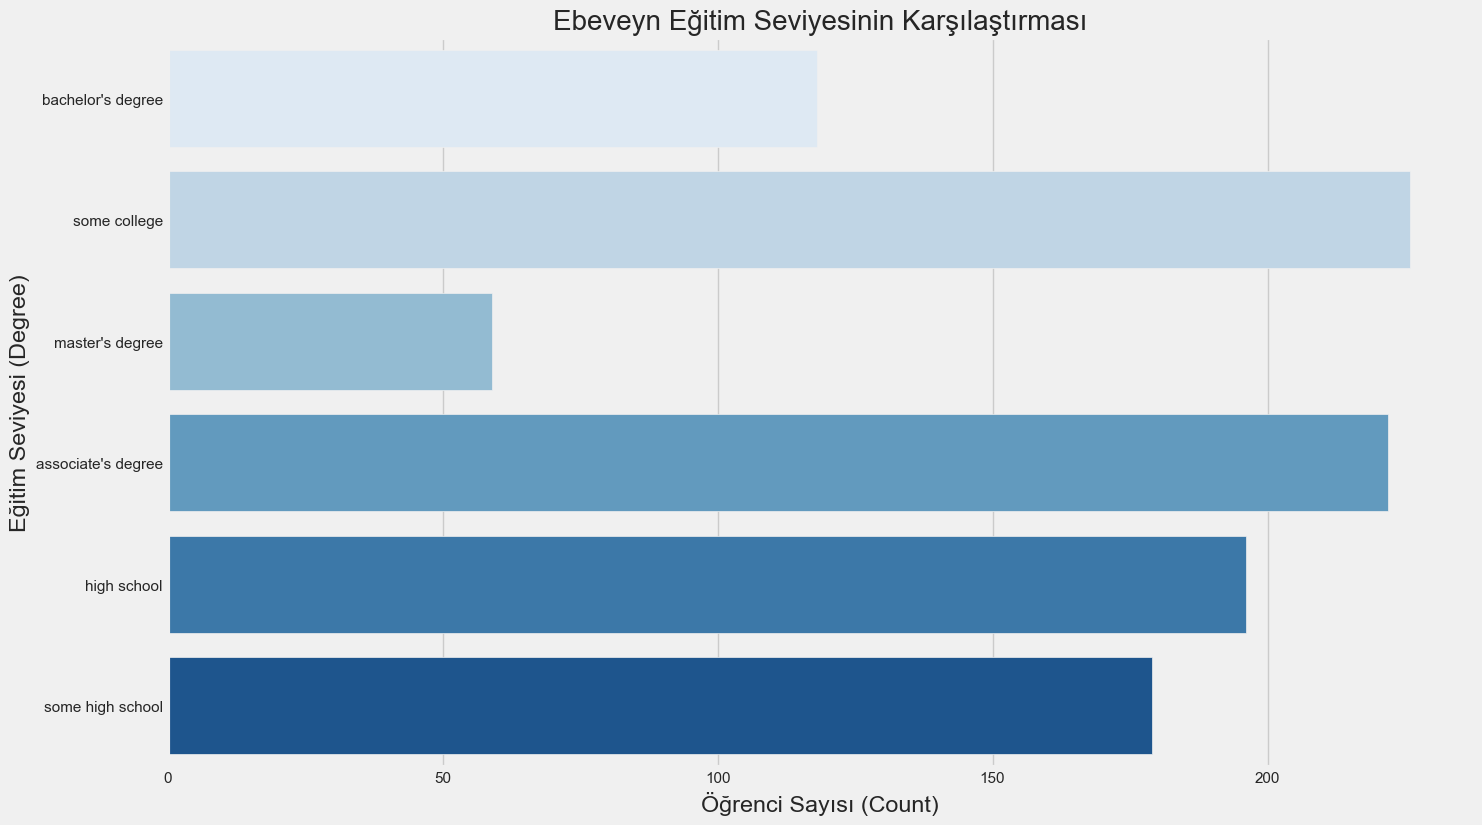

In [44]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Ebeveyn Eğitim Seviyesinin Karşılaştırması', fontweight = 30, fontsize = 20)
plt.xlabel('Öğrenci Sayısı (Count)')
plt.ylabel('Eğitim Seviyesi (Degree)')
plt.show()

#### Yorum 
- En fazla ebeveynin eğitim seviyesi "Some College".

#### İki Değişkenli Analiz (Bivariate Analysis) – Ebeveynin eğitim seviyesi, öğrencinin performansını etkiliyor mu?

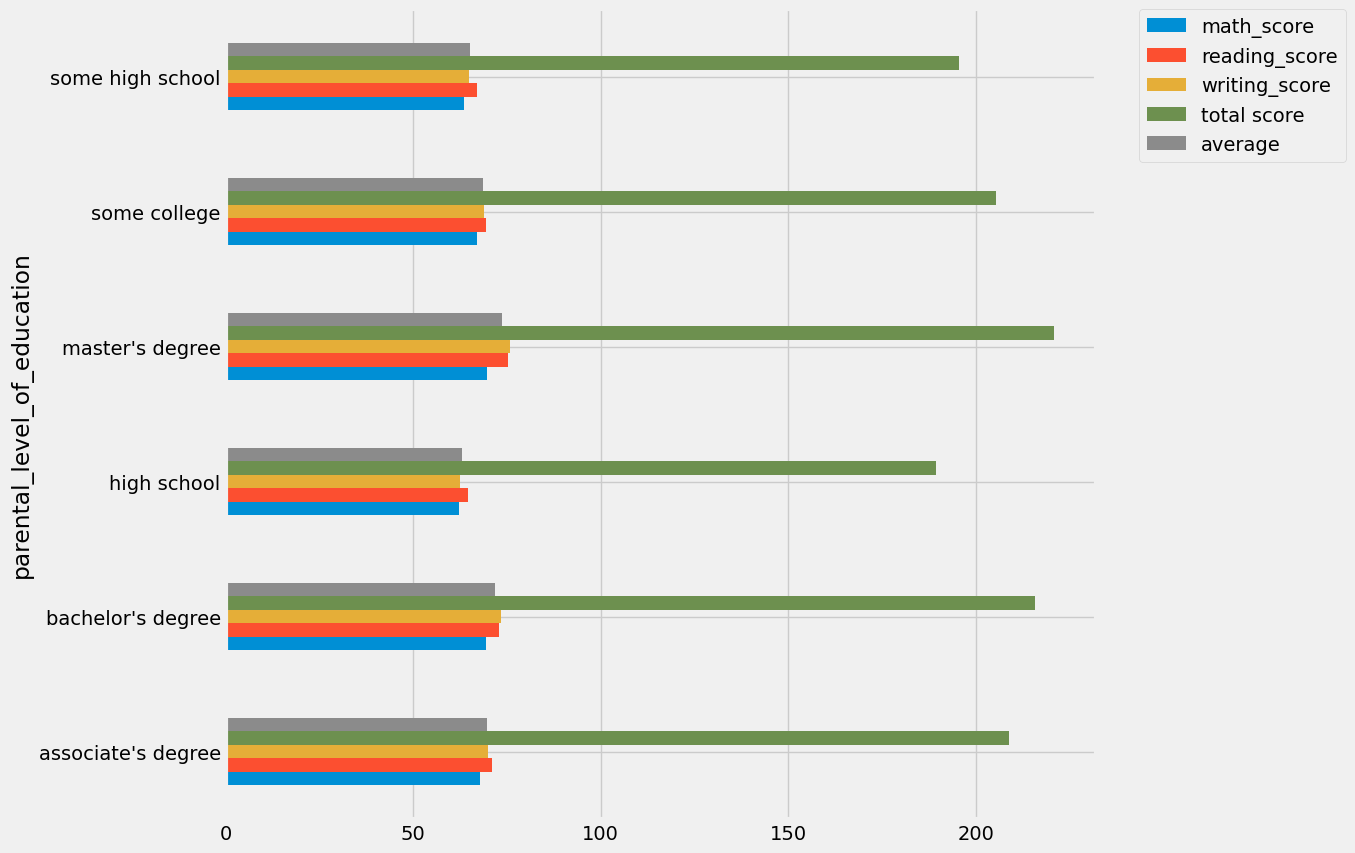

In [30]:
df.groupby('parental_level_of_education')[df.select_dtypes(include='number').columns].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Yorum 
- Ebeveynleri yüksek lisans (master) ve lisans (bachelor) seviyesinde eğitim almış öğrencilerin puanları, diğerlerine göre daha yüksek.

#### 4.4.4 Öğle Yemeği Sütunu
- Öğrenciler arasında en yaygın öğle yemeği türü hangisi?
- Öğle yemeği türünün sınav sonuçları üzerindeki etkisi nedir?

#### Tek Değişkenli Analiz (Univariate Analysis) – Öğrenciler arasında en yaygın öğle yemeği türü hangisi? 

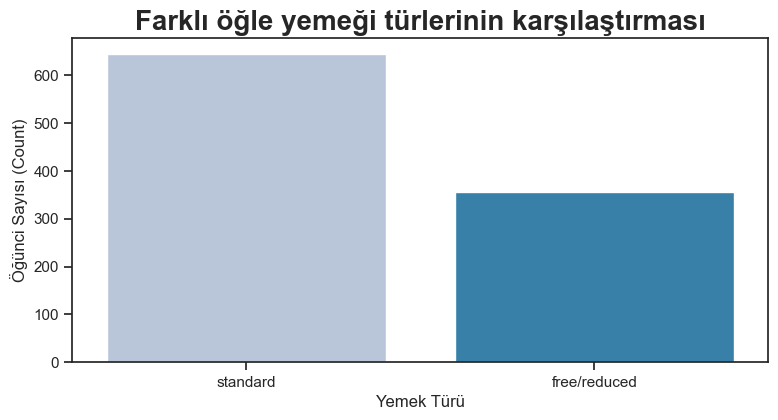

In [62]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.set_theme(style="ticks")  # veya "whitegrid", "darkgrid", "ticks"
sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Farklı öğle yemeği türlerinin karşılaştırması', fontweight='bold', fontsize=20)
plt.xlabel('Yemek Türü')
plt.ylabel('Öğünci Sayısı (Count)')
plt.show()


#### Insights 
- Öğrencilere sunulan standart (Standard) öğle yemeği, ücretsiz (Free) öğle yemeğinden daha fazlaydı.

#### İki Değişkenli Analiz (Bivariate Analysis) – Öğle yemeği türü öğrencinin performansını etkiliyor mu?

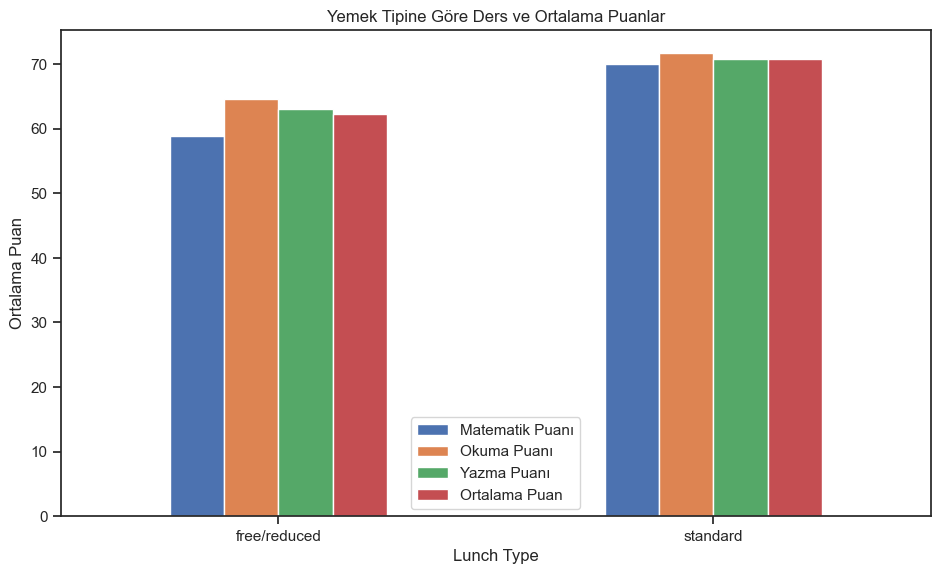

In [57]:
lunch_group = df.groupby('lunch')[['math_score','reading_score','writing_score','average']].mean()

lunch_group.plot(kind='bar', figsize=(10,6))
plt.title('Yemek Tipine Göre Ders ve Ortalama Puanlar')
plt.xlabel('Lunch Type')
plt.ylabel('Ortalama Puan')
plt.xticks(rotation=0)
plt.legend(['Matematik Puanı','Okuma Puanı','Yazma Puanı','Ortalama Puan'])
plt.show()

Text(0.5, 0, 'Ortalama Puan')

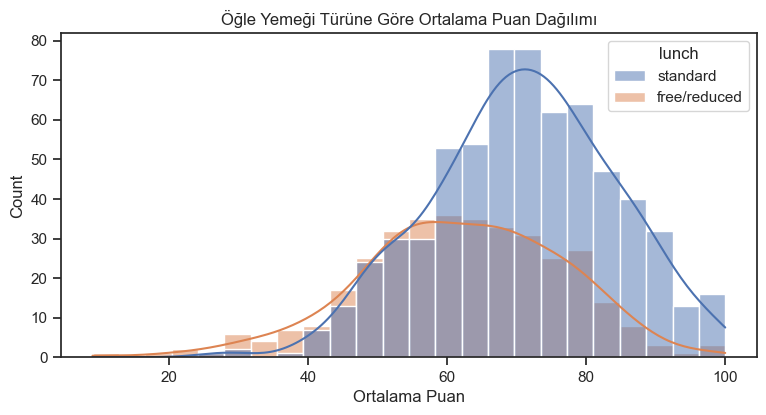

In [75]:
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('Öğle Yemeği Türüne Göre Ortalama Puan Dağılımı')
plt.xlabel('Ortalama Puan') 

#### Yorum 
- Standart öğle yemeği (standard lunch) alan öğrenciler, ücretsiz veya indirimli öğle yemeği (free/reduced lunch) alan öğrencilere göre daha iyi performans göstermektedir.

#### 4.4.5 Sınava Hazırlık Kursu (Test Preparation Course) Sütunu
- Öğrenciler arasında en yaygın sınava hazırlık kursu durumu nedir?
- Sınava hazırlık kursuna katılmak, öğrencinin performansı üzerinde bir etkiye sahip mi?

#### İKİ DEĞİŞKENLİ ANALİZ Sınava hazırlık kursuna  katılmak öğrencinin performansını etkiler mi?

In [58]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


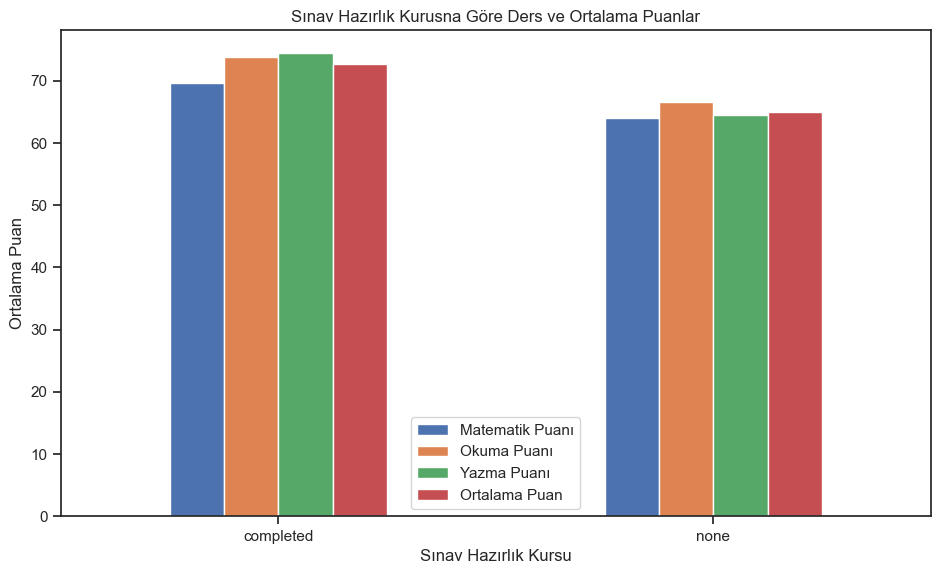

In [ ]:
test_prep_group = df.groupby('test_preparation_course')[['math_score','reading_score','writing_score','average']].mean()

test_prep_group.plot(kind='bar', figsize=(10,6))
plt.title('Sınav Hazırlık Kursuna Göre Ders ve Ortalama Puanlar')
plt.xlabel('Sınav Hazırlık Kursu')
plt.ylabel('Ortalama Puan')
plt.xticks(rotation=0)
plt.legend(['Matematik Puanı','Okuma Puanı','Yazma Puanı','Ortalama Puan'])
plt.show()

#### Yorumlar  
- Sınava hazırlık kursunu tamamlayan öğrenciler, kursa katılmayanlara göre üç derste de daha yüksek puanlar almıştır.

#### 4.4.6 Aykırı Değerleri (Outliers) Kontrol Etme

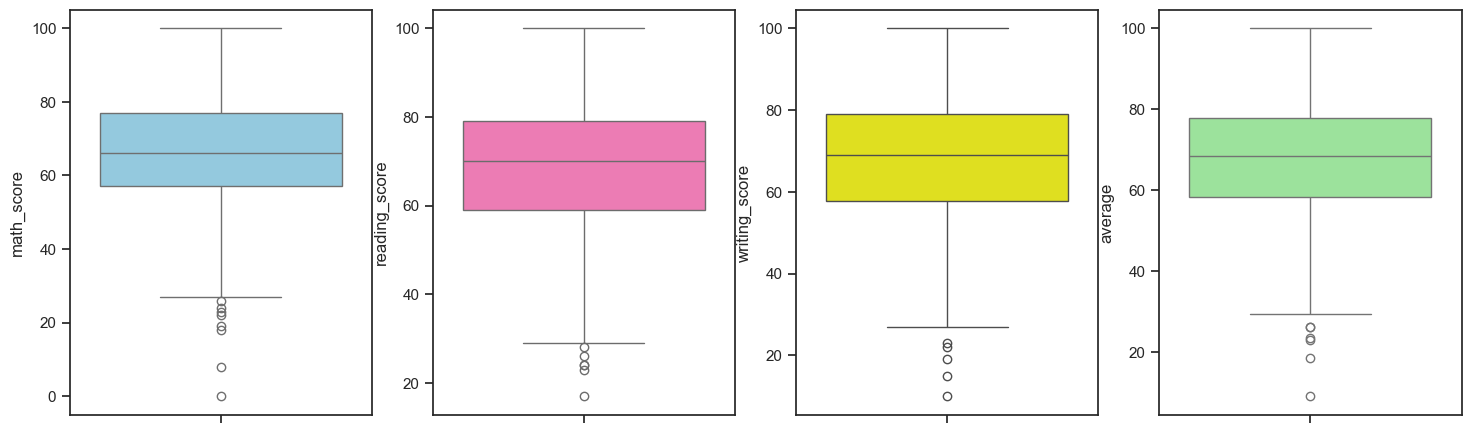

In [60]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Çok Değişkenli Analiz (Multivariate Analysis) – Pairplot Kullanımı

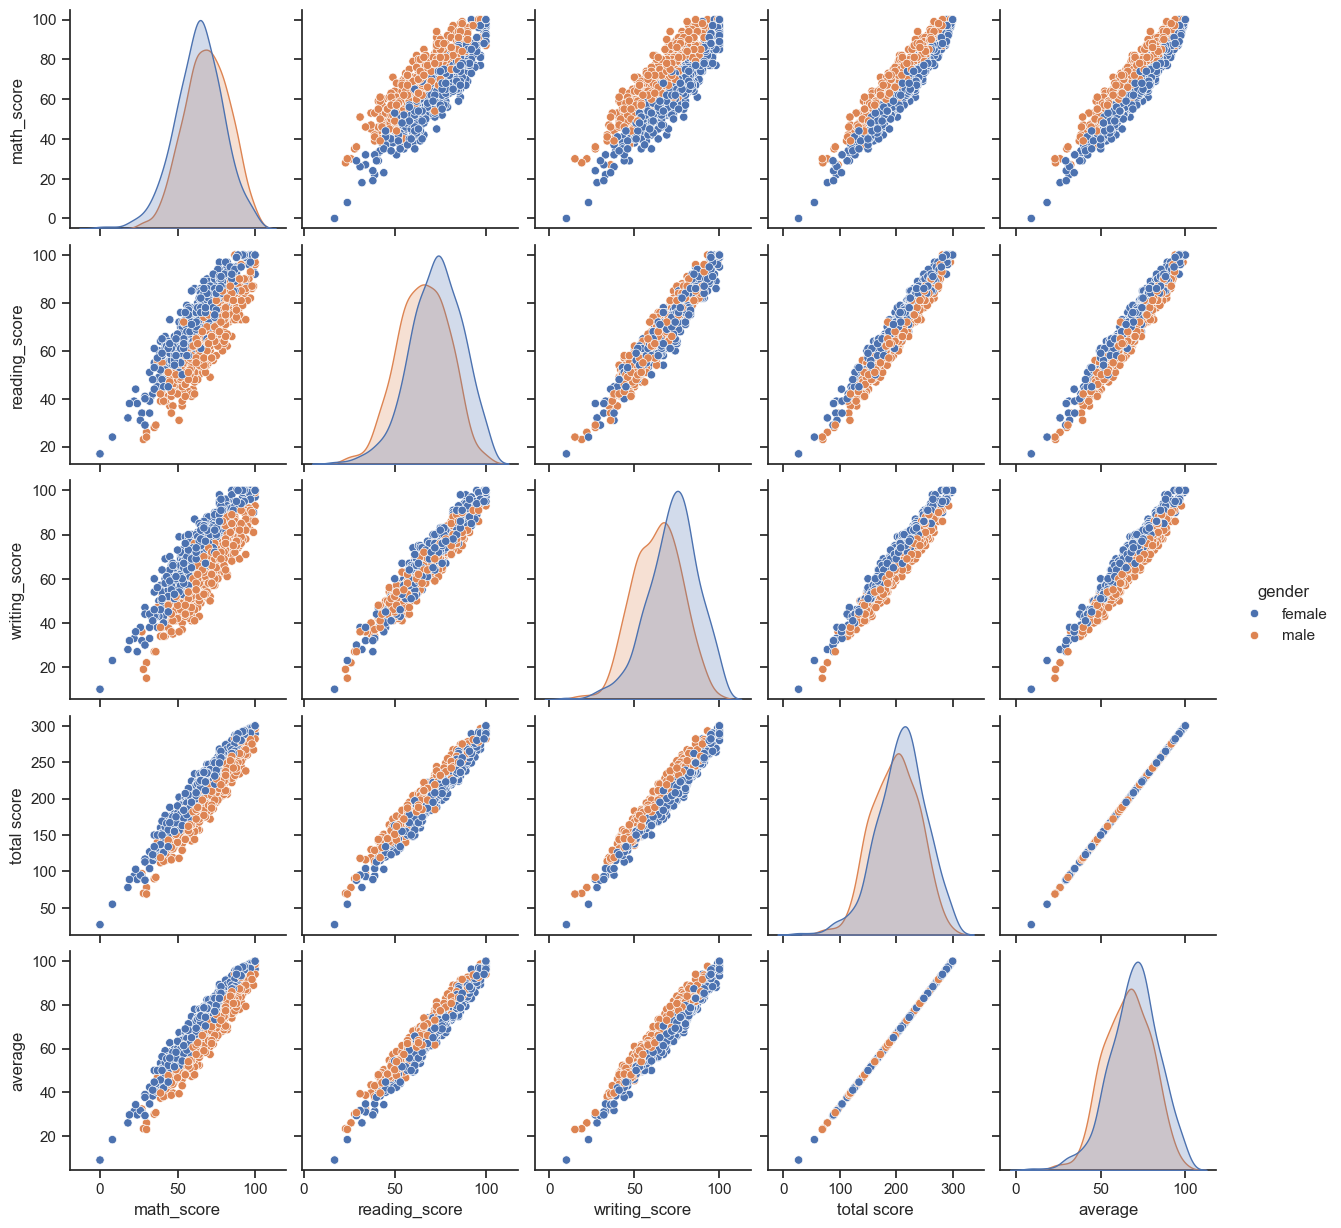

In [35]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Yorumlar
- Yukarıdaki grafikten açıkça görülüyor ki, tüm puanlar birbirleriyle doğrusal olarak artıyor.

### 5. Sonuçlar
- Öğrencilerin performansı öğle yemeği, Irk/Etnik köken ve ebeveynin eğitim seviyesi ile ilişkili.
- Kadın öğrenciler, genel olarak daha iyi performans gösteriyor ve derslerin çoğunda en yüksek puanları alıyor.
- Öğrencilerin performansı, sınava hazırlık kursu ile ilişkili.